In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
# Функция печати изображения в монохромном формате

def imshow(img, cmap = "gray"):
    plt.imshow(img, cmap)
    plt.show()     

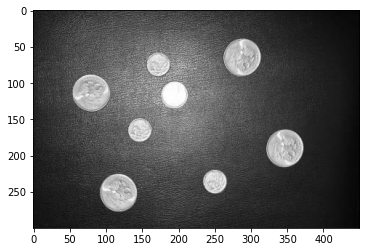

In [8]:
img = cv2.imread("coins.jpg")
plt.imshow(img)

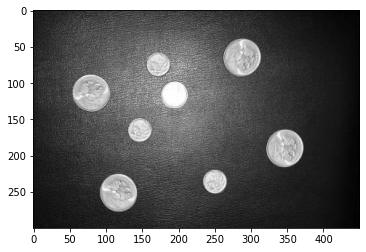

In [9]:
# Монохромное изображение
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(gray)

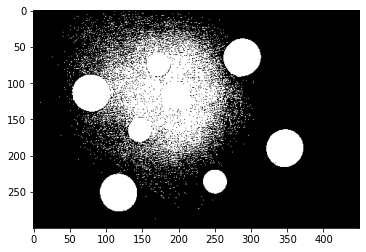

In [10]:
# Если сразу применить фильтр Оцу к изображению, получим следующую проблему: на подсвеченной области много светлых пикселей

thresh, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
imshow(binary)

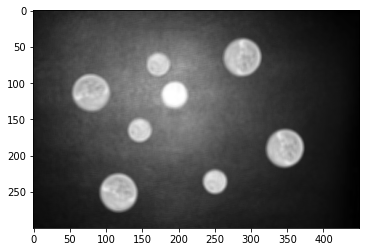

In [11]:
# Простейшим решением является применение фильтра Blur.

size = 5
blur_kernel = np.ones((size,size))
blur_kernel /= (size*size)
gray = cv2.filter2D(gray, -1, blur_kernel)
imshow(gray)

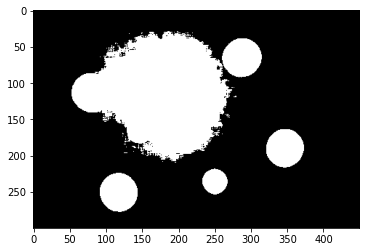

In [12]:
thresh, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
imshow(binary)

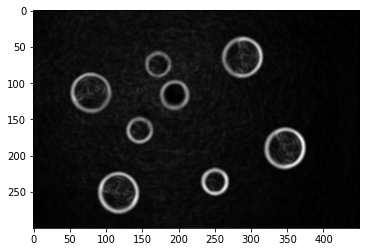

In [13]:
# На этом этапе получаем контуры объектов

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5, 5))
gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
imshow(gradient)

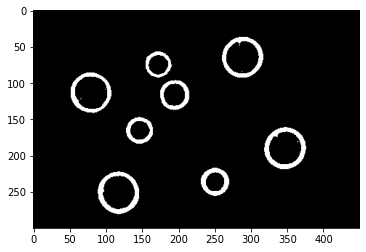

In [14]:
# Применим к gradient threshold

thresh, binary = cv2.threshold(gradient, 0, 255, cv2.THRESH_OTSU)
imshow(binary)

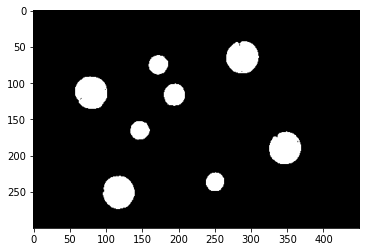

In [15]:
# Необходимо залить кольца монет

filled = 255 - binary # Реверс изображения для получения сердцевин
h, w = binary.shape
mask = np.zeros ([h + 2, w + 2], np.uint8) 
cv2.floodFill(filled, mask, (0,0), (0, 0, 0))
plt.imshow(filled, cmap='gray')

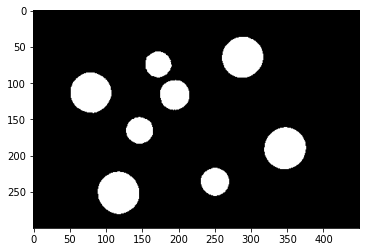

In [16]:
# Объединяем контур и сердцевину для получения объектов

filled += binary
imshow(filled)

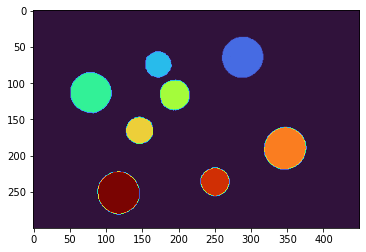

In [17]:
# Выделение и подсчёт компонент. Также, как отдельная компонента учитывается и фон

count_components, markers = cv2.connectedComponents(filled)
imshow(markers, "turbo")

In [18]:
count_components

9

In [19]:
# Чтобы отделить большие монеты от маленьких, можно разделить компоненты на большие по площади именьшие.
# Каждый маркер содержит в себе количество пикселей объекта. Можно объекты по количеству пикселей.
# Взять среднее взвешенное значение пикселей, и его принять за разграничитель
# Очевидно, что наибольшей по размеру компонентой будет фон. Его не нужно учитывать.

background = 0 
max_pix = 0
for i in range(count_components):
    pix_count = len(markers[markers==i])
    if (pix_count > max_pix):
        max_pix = pix_count
        background = i
print("Номер маркера фона: ",background)

Номер маркера фона:  0


In [20]:
# Подсчёт среднего взвешенного

avg = 0
avg += len(markers[markers!=background])
avg /= (count_components-1)
avg

1832.625

In [21]:
# Объекты без фона. Посчитаем ложки и кубики

big_coins = 0
small_coins = 0

for i in range(1, count_components):
    pix_count = len(markers[markers==i])
    if (pix_count > avg):
        big_coins+=1
    else:
        small_coins +=1     
print("Большие: ", big_coins, "; маленькие: ", small_coins, "; общее количество: ", big_coins + small_coins) 

Большие:  4 ; маленькие:  4 ; общее количество:  8
